In [1]:
import pandas as pd
df=pd.read_csv("cleaned_wash_mac.csv",index_col=0)
df.head()

,ratings,discounts,prices,brand,energy_rating,capacity,max_spin_speed
0,24972,23,18790,Whirlpool,5,8.0,740
1,11841,39,15490,Panasonic,5,7.0,700
2,24972,24,14590,Whirlpool,5,7.0,740
3,22205,25,12890,Whirlpool,5,8.5,1400
4,37103,19,11490,LG,5,7.0,1350


In [2]:
df.describe()

,ratings,discounts,prices,energy_rating,capacity,max_spin_speed
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,13984.178218,28.655941,19247.071782,4.980198,8.011139,1089.594059
std,21662.205415,10.165769,9753.335054,0.171416,1.447767,309.000692
min,3.000000,4.000000,6790.000000,3.000000,5.500000,55.000000
25%,473.750000,23.000000,12536.500000,5.000000,7.000000,740.000000
50%,3235.000000,27.000000,15999.000000,5.000000,8.000000,1200.000000
75%,20325.000000,34.000000,24540.000000,5.000000,9.000000,1400.000000
max,84073.000000,60.000000,58990.000000,5.000000,14.000000,1600.000000


In [3]:
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df.describe(include="O")

,brand
count,404
unique,24
top,Whirlpool
freq,63


In [5]:
df.brand.value_counts(normalize=True)

brand
Whirlpool                                       0.155941
LG                                              0.123762
SAMSUNG                                         0.089109
IFB                                             0.086634
Godrej                                          0.081683
Voltas Beko                                     0.074257
Thomson                                         0.054455
Haier                                           0.051980
BOSCH                                           0.049505
Panasonic                                       0.039604
Lloyd                                           0.037129
ONIDA                                           0.032178
MarQ by Flipkart                                0.029703
MOTOROLA                                        0.027228
realme TechLife                                 0.024752
Sansui                                          0.007426
Acer                                            0.007426
Singer                   

<Axes: ylabel='brand'>

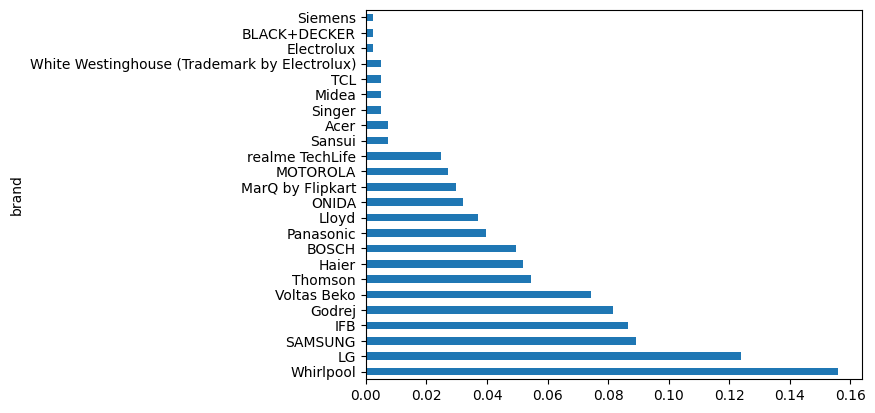

In [6]:
df.brand.value_counts(normalize=True).plot(kind="barh")

### IN THE ABOVE PLOT WE CAN OBSERVE THE PROPORTION OF EACH BRAND BY THEIR FREQUENCY

<Axes: xlabel='max_spin_speed', ylabel='Count'>

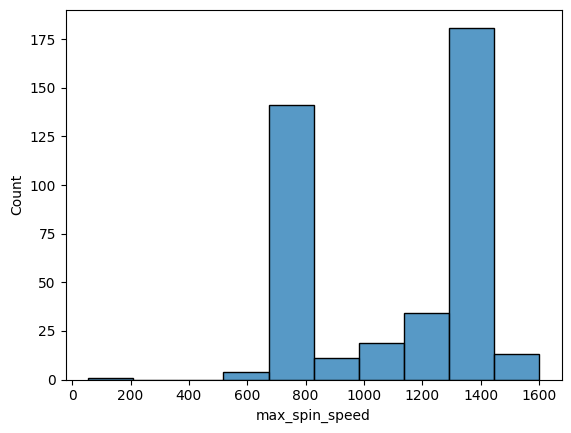

In [7]:
sns.histplot(df.max_spin_speed)

### THE ABOVE PLOT EXPLAINS THAT THERE IS MOST OF THE WASHING MACHINES IN DATA IN THE 1400 RPM 

<Axes: xlabel='discounts', ylabel='Count'>

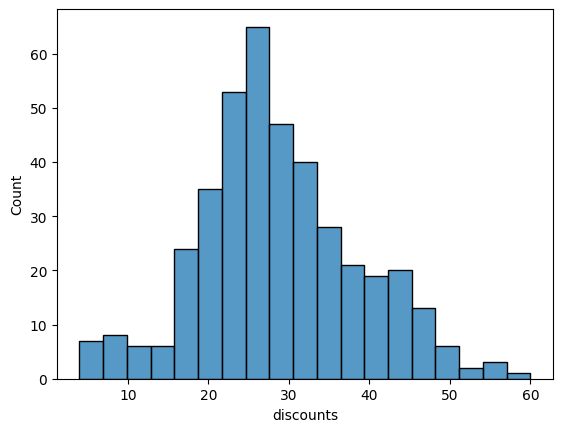

In [8]:
sns.histplot(df.discounts)

# THE DISCOUNTS COLUMN IS QUIET CLOSER TO NORMAL DISTRIBUTION WHICH IS VERY USEFUL FOR MODEL TRAINING

<Axes: xlabel='ratings', ylabel='Count'>

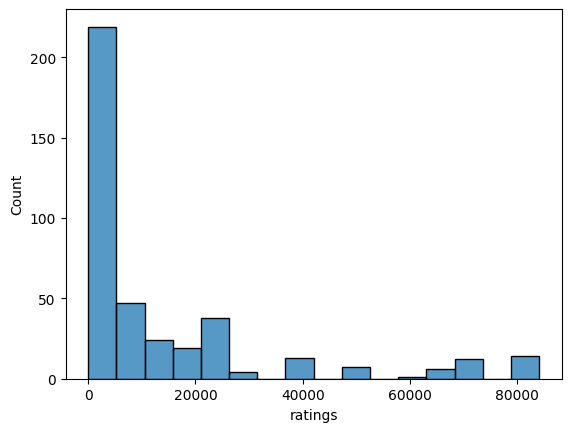

In [9]:
    sns.histplot(df.ratings)

# THE ABOVE PLOT SHOWS THAT THERE MIGHT BE OUTLIERS IN THE RATINGS COLUMN AND IT EXPLAINS US THERE IS MOST OF THE RATINGS UNDER 20000

<Axes: ylabel='ratings'>

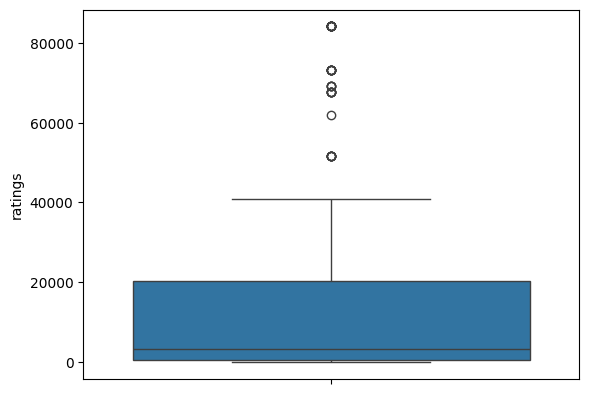

In [10]:
sns.boxplot(df.ratings)

# THE ABOVE BOXPLOT SHOWS THAT THE RATINGS COLUMN SEEMS DESCENT

In [11]:
(df.ratings>45000).sum()

np.int64(40)

<Axes: >

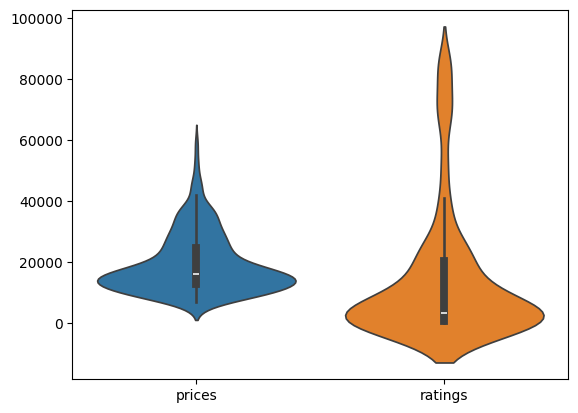

In [12]:
sns.violinplot(df[["prices","ratings"]])

<Axes: xlabel='prices', ylabel='Count'>

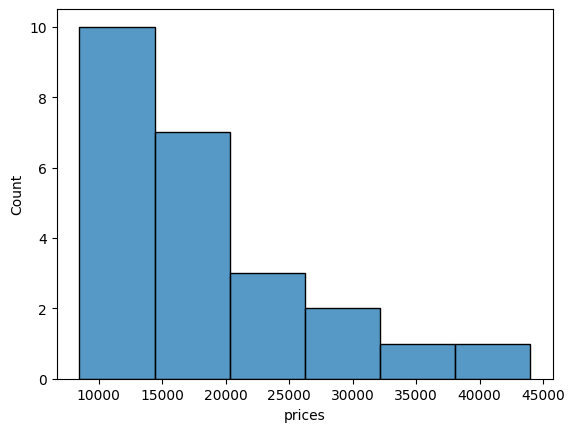

In [13]:
sns.histplot(df.groupby("brand")["prices"].mean())

# BY ABOVE PLOT WE CAN UNDERSTAND THAT THE AVERAGE PRICES OF THE MOST OF BRANDS LIES BETWEEN 10-20K

In [14]:
pd.pivot_table(df,index="brand",values="discounts",aggfunc="mean")

,discounts
brand,
Acer,50.666667
BLACK+DECKER,34.000000
BOSCH,30.150000
Electrolux,53.000000
Godrej,33.424242
Haier,35.190476
IFB,22.600000
LG,23.480000
Lloyd,29.333333


In [29]:
pd.crosstab(df.brand,df.energy_rating)

energy_rating,3,4,5
brand,,,
Acer,0,0,3
BLACK+DECKER,0,0,1
BOSCH,0,1,19
Electrolux,0,0,1
Godrej,0,0,33
Haier,0,0,21
IFB,0,0,35
LG,0,0,50
Lloyd,0,0,15


### WE CAN CLEARLY OBSERVE THAT THERE IS MOSTLY 5 ENERGY_RATING MACHINES IN OUR DATASET AND WHIRLPOOL AND LG HAS THE HIGHEST 5 ENERGY_RATING WASHING MACHINES AND 4 STAR ENERGY_RATING IN ONLY TWO COMPANIES THEY ARE PANASONIC WITH 3 AND BOSCH WITH 1 AND THERE IS ONLY TWO 3 ENERGY_RATING WASHING MACHINES WHICH ARE FROM SAMSUNG

In [31]:
df["capacity"].groupby(df["brand"]).mean()

brand
Acer                                             7.166667
BLACK+DECKER                                     6.000000
BOSCH                                            8.000000
Electrolux                                       9.000000
Godrej                                           7.712121
Haier                                            8.023810
IFB                                              7.757143
LG                                               8.150000
Lloyd                                            8.266667
MOTOROLA                                         8.545455
MarQ by Flipkart                                 7.625000
Midea                                            7.000000
ONIDA                                            7.615385
Panasonic                                        6.937500
SAMSUNG                                          7.972222
Sansui                                           8.000000
Siemens                                          8.000000
Singer  

In [ ]:
### WE CAN OBSERVE THAT THE SINGER COMPANY HAS THE HIGHEST AVERAGE IN CAPACITY WHICH MIGHT BE VERY FEW PRODUCTS OR CONSISTENT RELEASE OF PRODUCTS WITH CAPACITY 10 AS WE ALREADY FOUND THE PROPORTION OF ALL THE BRANDS SINGER GOT 

In [15]:
df.select_dtypes(exclude="O").corrwith(df["discounts"])

ratings          -0.119287
discounts         1.000000
prices           -0.194931
energy_rating     0.124238
capacity          0.058259
max_spin_speed    0.011875
dtype: float64

# WE CAN OBSERVE THAT DISCOUNTS HAVE SOME LITTLE CORRELATION WITH PRICE

Text(0, 0.5, 'prices')

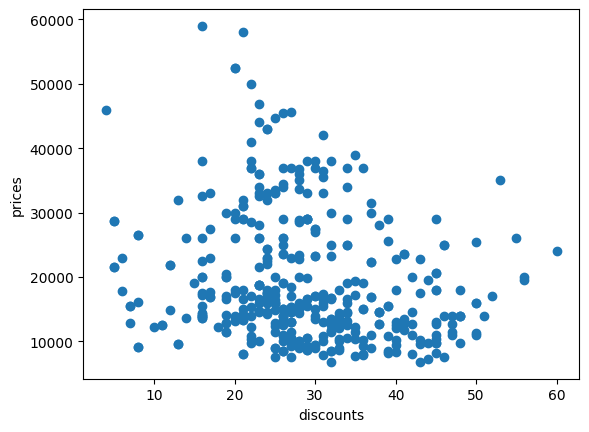

In [16]:
plt.scatter(df.discounts,df.prices)
plt.xlabel("discounts")
plt.ylabel("prices")

# AS WE OBSERVED BEFORE THE WASHING MACHINES PRICES ARE AROUND 10-20K DUE TO THE HUGE DICOUNTS OF 20-30%

<Axes: xlabel='discounts', ylabel='prices'>

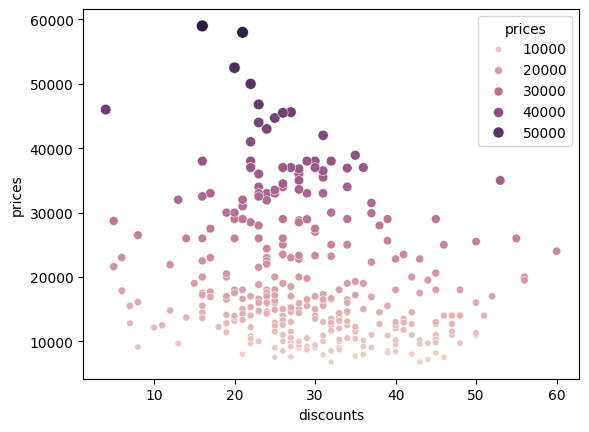

In [17]:
sns.scatterplot(x=df.discounts,y=df.prices,hue=df.prices,size=df.prices)

In [18]:
df.select_dtypes(exclude="O").corrwith(df["prices"])

ratings           0.109083
discounts        -0.194931
prices            1.000000
energy_rating     0.030833
capacity          0.195070
max_spin_speed   -0.060104
dtype: float64

# BY THE ABOVE CORRELATIONS WE CAN OBSEVRE THERE IS VERY LESS CORRELATION AMONG THE FEATURES WITH THE PRICE TARGET FEATURE BUT [RATINGS,DISCOUNTS,CAPACITY] HAVE A LITTLE CORRELATION WITH PRICES COMPARING WITH OTHER FEATURES

In [19]:
df.select_dtypes(exclude="O").corr()

,ratings,discounts,prices,energy_rating,capacity,max_spin_speed
ratings,1.000000,-0.119287,0.109083,-0.062585,-0.038558,-0.013278
discounts,-0.119287,1.000000,-0.194931,0.124238,0.058259,0.011875
prices,0.109083,-0.194931,1.000000,0.030833,0.195070,-0.060104
energy_rating,-0.062585,0.124238,0.030833,1.000000,0.120875,0.129146
capacity,-0.038558,0.058259,0.195070,0.120875,1.000000,0.186286
max_spin_speed,-0.013278,0.011875,-0.060104,0.129146,0.186286,1.000000


# CONCLUSION:WE CANNOT FIND ANY BETTER CORRELATION AMONG THE FEATURES BUT ITS BETTER TO BUILD MODEL BEFORE TAKING DECISON WITH FEATURES HAVING A LITTLE CORRELATION WE OBSERVED THAT MOST OF THE PRICES ARE AROUND 10-20K WHICH IS DUE TO THE DISCOUNTS FOR 20-30% AND ALSO THERE IS LITTLE MULTICOLINIARITY AMONG FEW FEATURES 